### Libraries Used
* Pandas, Numpy - Data Loading / Transformation / Analysis
* Matplotlib, Seaborn - Plotting / Visualization
* Sklearn - ML Algorithms / Preprocessing ( PCA, TfidF Vectorizer )

In [1]:
# Allow rendering of Matplotlib plots directly on Jupyter Notebooks.
%matplotlib inline

# Import all dependencies required for the problem.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Beautify the traditional looking plots.
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [2]:
# Setup a random seed value, to obtain predictable results in experiments.
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
# Load the titanic dataset and drop records which have missing data.
df = pd.read_excel('../../data/titanic_dataset.xlsx').dropna(subset=['Age'])

### Data Dictionary

    Variable	Definition	Key
    survival	Survival	0 = No, 1 = Yes
    pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    sex	Sex	
    Age	Age in years	
    sibsp	# of siblings / spouses aboard the Titanic	
    parch	# of parents / children aboard the Titanic	
    ticket	Ticket number	
    fare	Passenger fare	
    cabin	Cabin number	
    embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

    parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
# Preview the dataset.
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
# Gender based Average Survival Rate.
df.pivot_table(index=['Sex'], values=['Survived'], aggfunc=np.mean)

,Survived
Sex,
female,0.754789
male,0.205298


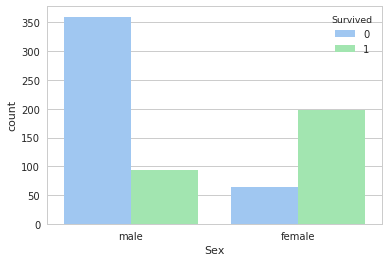

In [6]:
sns.countplot(x='Sex', hue='Survived', data=df)

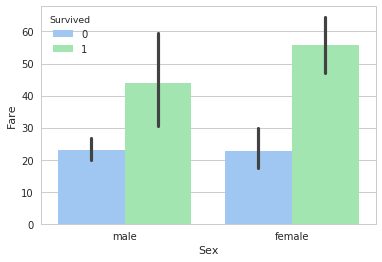

In [7]:
sns.barplot(x='Sex', y='Fare', hue='Survived', data=df)

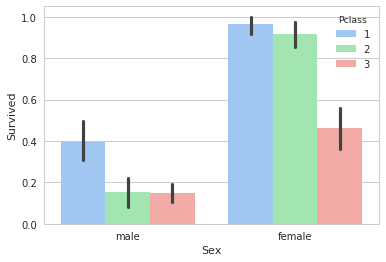

In [8]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)

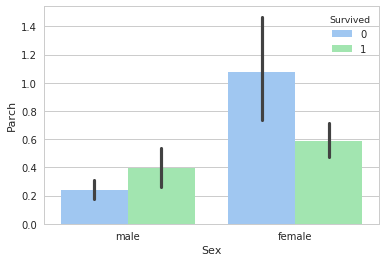

In [9]:
sns.barplot(x='Sex', y='Parch', hue='Survived', data=df)

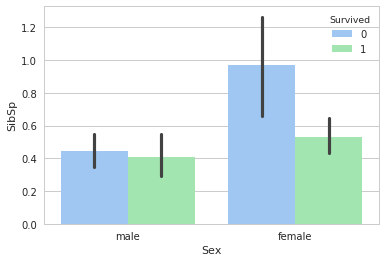

In [10]:
sns.barplot(x='Sex', y='SibSp', hue='Survived', data=df)

In [11]:
# df['Cabin Sections'] = df['Cabin'].map(lambda x: x[0])
# sns.barplot(x='Cabin Sections', y='Survived', data=df)

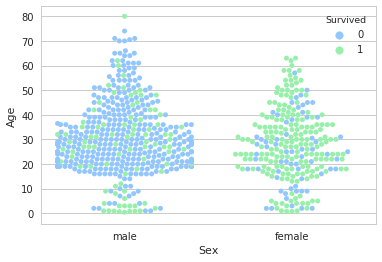

In [12]:
sns.swarmplot(x='Sex', y='Age', hue='Survived', data=df)

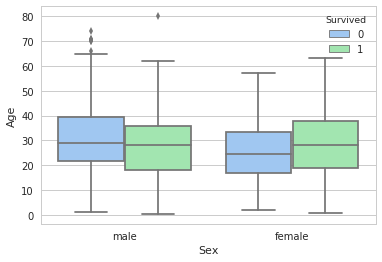

In [13]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)

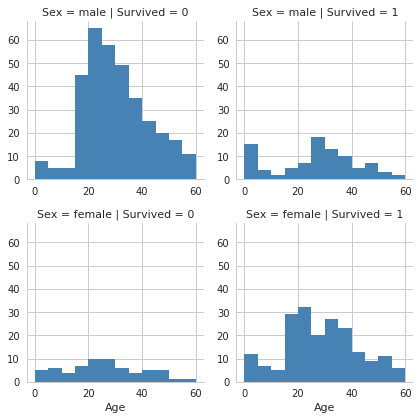

In [14]:
g = sns.FacetGrid(df, row='Sex', col='Survived')
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "Age", color="steelblue", bins=bins, lw=0)

In [15]:
titles= {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
}
df['Title'] = df['Name'].map(lambda name: titles[name.split(',')[1].split('.')[0].strip()])

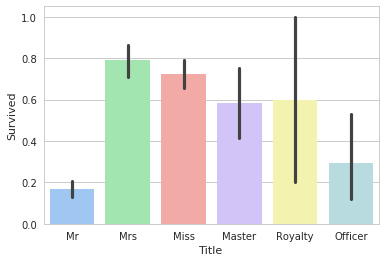

In [16]:
sns.barplot(x='Title', y='Survived', data=df)

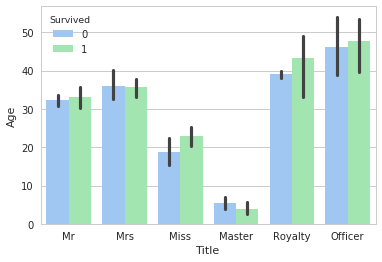

In [17]:
sns.barplot(x='Title', y='Age', hue='Survived', data=df)

In [18]:
df['Old People'] = np.where(df['Age'] >= 60, 1, 0)
df['Children'] = np.where(df['Age'] <= 12, 1, 0)
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df['Alone'] = df['FamilySize'].map(lambda s : 1 if s == 1 else 0)
df['Couple'] = df['FamilySize'].map(lambda s : 1 if s==2 else 0)
df['Family'] = df['FamilySize'].map(lambda s : 1 if 3<=s else 0)

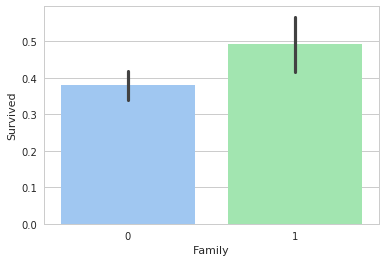

In [19]:
sns.barplot(x='Family', y='Survived', data=df)

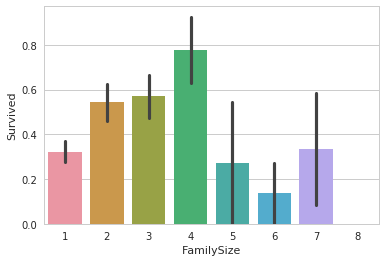

In [20]:
sns.barplot(x='FamilySize', y='Survived', data=df)

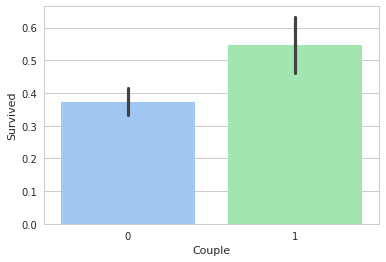

In [21]:
sns.barplot(x='Couple', y='Survived', data=df)

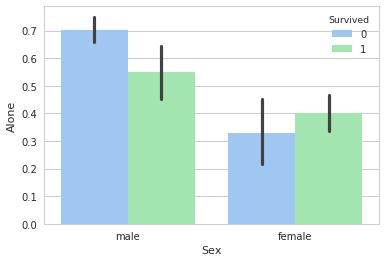

In [22]:
sns.barplot(y='Alone', x='Sex', hue='Survived', data=df)

In [23]:
# MultiLevel Survival Rate
df.pivot_table(index=['Sex', 'Pclass'], values=['Survived'], aggfunc=np.mean)

Survived
Sex    Pclass          
female 1       0.964706
       2       0.918919
       3       0.460784
male   1       0.396040
       2       0.151515
       3       0.150198

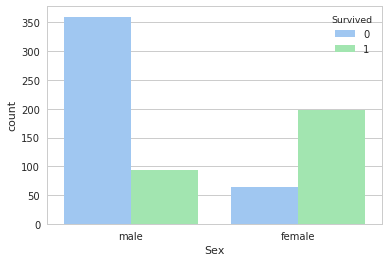

In [24]:
sns.countplot(x='Sex', hue='Survived', data=df)

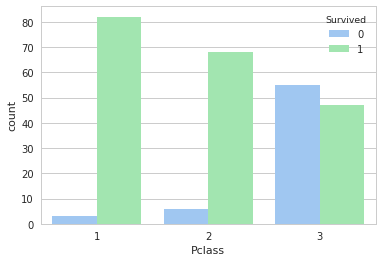

In [25]:
female_passenger_data = df[(df['Sex'] == 'female')]
sns.countplot(x='Pclass', hue='Survived',
              data=female_passenger_data)

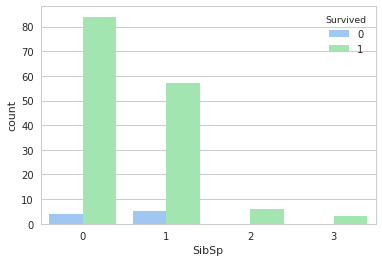

In [26]:
female_passenger_data = df[
    (df['Sex'] == 'female') &
    ((df['Pclass'] == 1) |
    (df['Pclass'] == 2))]
sns.countplot(x='SibSp', hue='Survived', data=female_passenger_data)

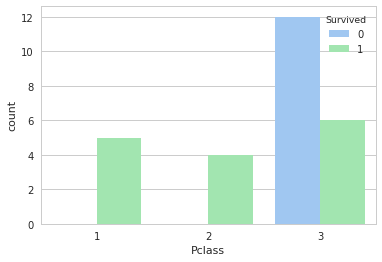

In [27]:
female_passenger_data = df[(df['Sex'] == 'female') & (df['SibSp'] >= 2)]
sns.countplot(x='Pclass', hue='Survived', data=female_passenger_data)

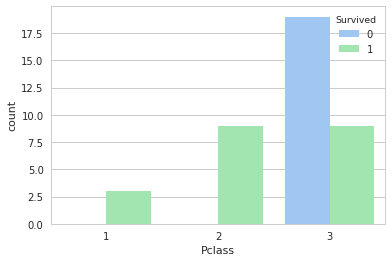

In [28]:
sns.countplot(x='Pclass', hue='Survived', data=df[(df['Age'] < 16) & (df['Sex'] == 'male')])

In [29]:
titles= {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
}
extracted_titles = []
for index, row in df.iterrows():
    result = row['Name'].split(',')[1]
    title = result.split('.')[0].strip()
    extracted_titles.append(titles.get(title, 'uknown'))
df['Title'] = extracted_titles

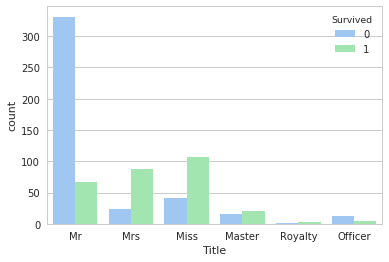

In [30]:
sns.countplot(x='Title', hue='Survived', data=df)